# Test TATER

### Tess trAnsiT fittER

In [1]:
import tater

In [2]:
tic_id = 43647325

transit_fitter = tater.TransitFitter(tic_id)

In [3]:
transit_fitter.download_data()

   retrieving stellar parameters...
------------------------------
   TIC ID:	TIC 43647325
   R_star:	1.09774 solRad
   M_star:	1.135 solMass
   logg:	4.41206
   Teff:	6072.0
   [Fe/H]:	-0.05
   u1:	0.2590956040409782
   u2:	0.29519228401192094
------------------------------
   acquiring TESS data...


   flattening light curve: 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]

   done.


Transit Least Squares TLS 1.0.28 (13 June 2021)
Creating model cache for 37 durations


  0%|          | 0/1819 periods | 00:00<?

Searching 15715 data points, 1819 periods from 0.8 to 12.45 days
Using all 4 CPU threads


100%|██████████| 1819/1819 periods | 00:28<00:00


   TCE found at $P = 3.160156$ days with SDE of 27.150139
 


  0%|          | 0/1819 periods | 00:00<?

Transit Least Squares TLS 1.0.28 (13 June 2021)
Creating model cache for 37 durations
Searching 14240 data points, 1819 periods from 0.8 to 12.45 days
Using all 4 CPU threads


100%|██████████| 1819/1819 periods | 00:20<00:00
   checking previous signals: 100%|██████████| 1/1 [00:00<00:00, 360.40it/s]

   No additional TCEs found above SDE=10.0.
 
   vetting TCEs...
 
   vetting recovered 1 planet candidate(s) from 1 TCE(s).


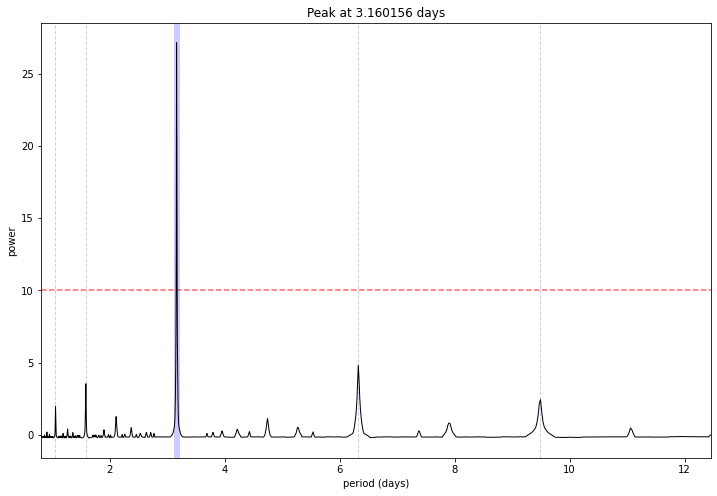

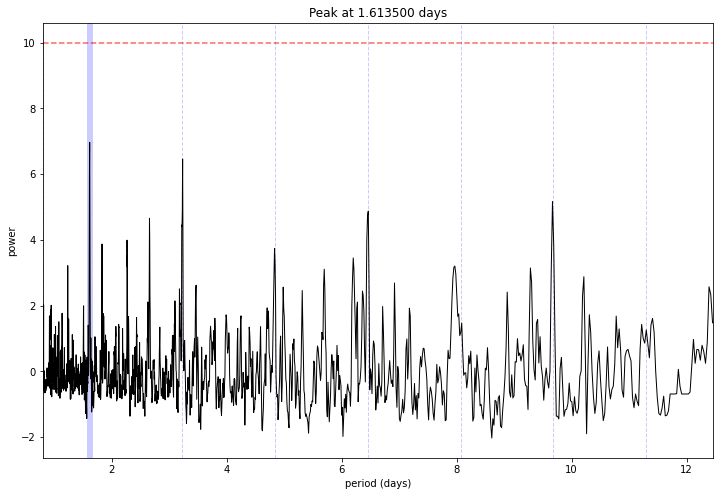

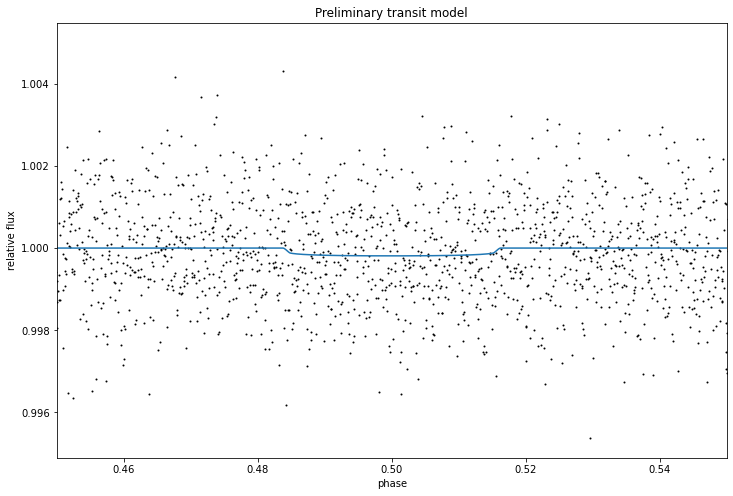

In [4]:
transit_fitter.find_planets();

In [5]:
#transit_fitter.TCEs[0].duration*24

In [6]:
"""
import matplotlib.pyplot as plt
plt.plot(transit_fitter.TCEs[0].folded_phase*transit_fitter.TCEs[0].period, transit_fitter.TCEs[0].folded_y)
plt.plot(transit_fitter.TCEs[0].model_folded_phase*transit_fitter.TCEs[0].period, transit_fitter.TCEs[0].model_folded_model)
plt.axvline(transit_fitter.TCEs[0].period/2 - transit_fitter.TCEs[0].duration/2)
plt.xlim(1.3, 1.8)
"""



'\nimport matplotlib.pyplot as plt\nplt.plot(transit_fitter.TCEs[0].folded_phase*transit_fitter.TCEs[0].period, transit_fitter.TCEs[0].folded_y)\nplt.plot(transit_fitter.TCEs[0].model_folded_phase*transit_fitter.TCEs[0].period, transit_fitter.TCEs[0].model_folded_model)\nplt.axvline(transit_fitter.TCEs[0].period/2 - transit_fitter.TCEs[0].duration/2)\nplt.xlim(1.3, 1.8)\n'

  0%|          | 13/10000 [00:00<01:16, 129.91it/s]

   Running MCMC for planet candidate with $P = 3.160156$ days (SDE=27.150139)


100%|██████████| 10000/10000 [00:49<00:00, 200.86it/s]


   saving results...
   done.


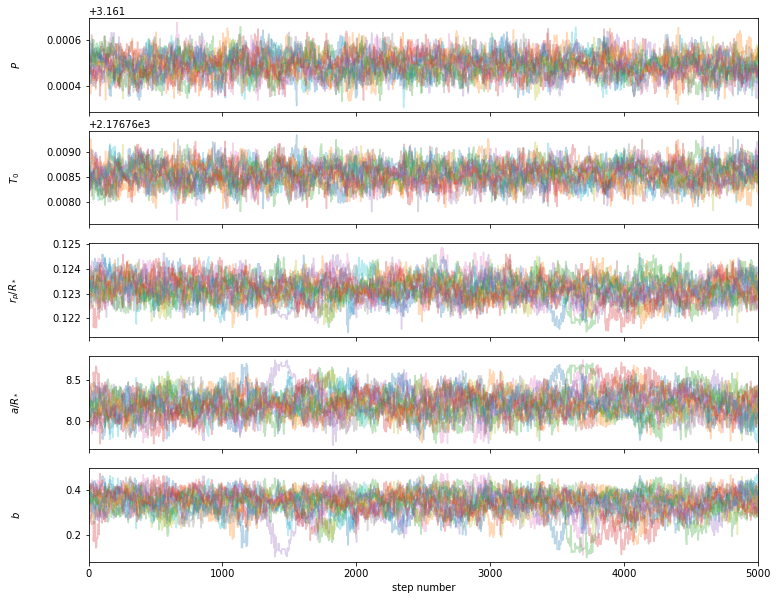

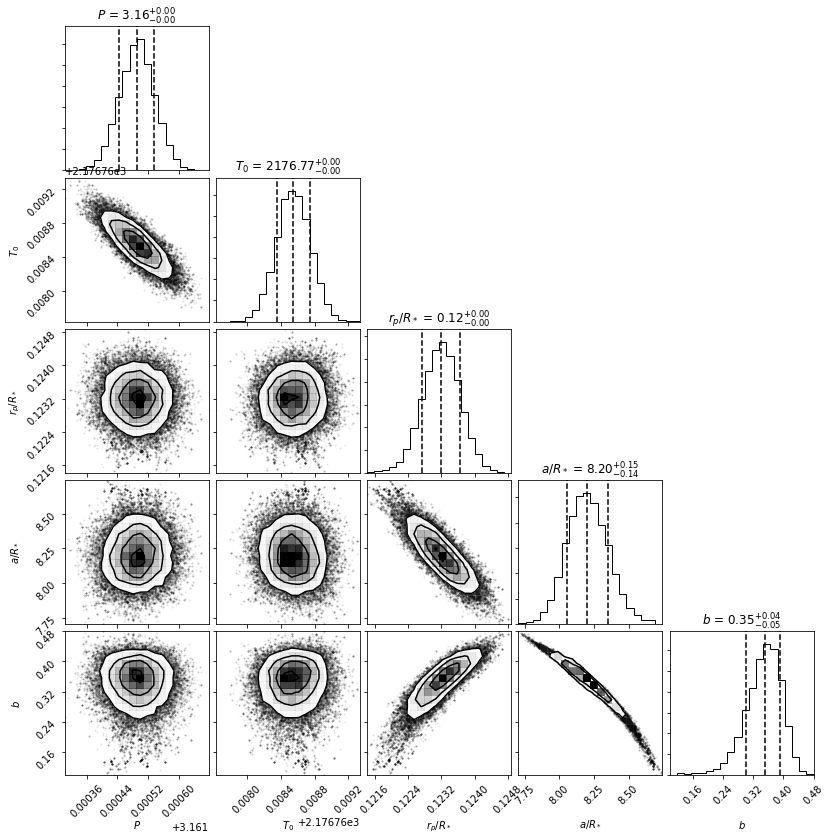

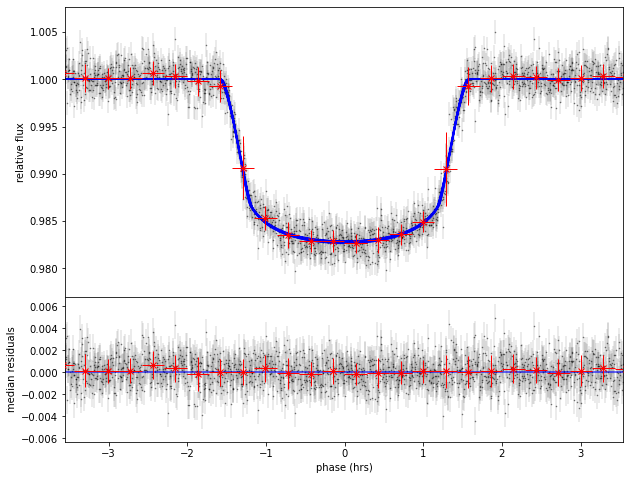

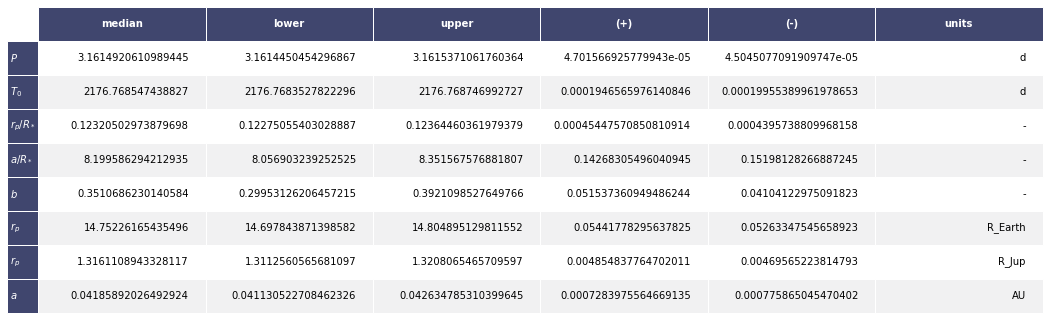

In [7]:
transit_fitter.fit_transits();

In [8]:
"[{:.5f}]".format(transit_fitter.planet_candidates[0].fit_results["median"]["$a$"])

'[0.04186]'

In [9]:
s t o p

SyntaxError: invalid syntax (<ipython-input-9-aea13beec5a8>, line 1)

In [ ]:
transit_fitter.planet_candidates[-1].fit_results

In [ ]:
import tater

In [ ]:
#tic_id = 138819293 #284475976 #236887394 #347329162 #284475976 #236887394 #28230919 358516596 43647325  
#tic_id = 269701147 # HD 191939
tic_id = 230127302 # TOI-1246

transit_fitter = tater.TransitFitter(tic_id)

In [ ]:
transit_fitter.download_data()

In [ ]:
transit_fitter.find_planets();

In [ ]:
import matplotlib.pyplot as plt
for TCE in transit_fitter.TCEs:
    
    plt.figure(figsize=(12,8))
    plt.axvline(TCE.period, alpha=0.2, lw=6, c="b")
    for i in range(2, 15):
        plt.axvline(TCE.period * i, alpha=0.2, lw=1, c="b", ls='--')
        plt.axvline(TCE.period / i, alpha=0.2, lw=1, c="b", ls='--')
    plt.plot(TCE.periods, TCE.power, 'k-', lw=1)
    plt.xlim([TCE.periods.min(), TCE.periods.max()])
    plt.xlabel("period (days)")
    plt.ylabel("power")
    plt.title(TCE.period)


In [ ]:
for TCE in transit_fitter.TCEs:
    
    plt.figure()
    plt.scatter(TCE.folded_phase, TCE.folded_y, s=1, c='k', alpha=0.2)
    plt.plot(TCE.model_folded_phase, TCE.model_folded_model)
    plt.title(TCE.period)
    plt.ticklabel_format(useOffset=False)
    plt.xlim([0.45, 0.55])
    plt.ylim([0.98, 1.02])
    plt.xlabel("phase")
    plt.ylabel("relative flux")
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import medfilt
for TCE in transit_fitter.TCEs:
    
    msk = TCE.SR > 0.1
    power_raw = (TCE.SR[msk] - np.mean(TCE.SR[msk])) / np.std(TCE.SR[msk])
    trend = medfilt(power_raw, 101)
    power = power_raw - trend
    power = power - np.mean(power)
    SDE = np.max(power / np.std(power))
    scale = SDE / np.max(power)
    power = power * scale
    
    plt.figure(figsize=(12,8))
    plt.plot(TCE.periods[msk], power_raw, 'r-', lw=1, alpha=0.8, label="my power_raw")
    plt.plot(TCE.periods[msk], trend, 'm-', lw=3, alpha=0.8, label="median trend")
    plt.plot(TCE.periods[msk], power, 'b-', lw=1, label="my power")
    plt.plot(TCE.periods[msk], TCE.power[msk], 'k-', alpha=0.3, lw=5, label="TLS power")
    plt.legend()
    
    print(TCE.SDE)
    print(SDE)

In [ ]:
transit_fitter.TCEs[0].keys()

In [ ]:
transit_fitter.TCEs[0].period

In [ ]:
import matplotlib.pyplot as plt
which=1

plt.figure(figsize=(12,8))
plt.plot(transit_fitter.TCEs[which].periods, transit_fitter.TCEs[which].power, 'k-')
plt.ylim([0, 0.1])

In [ ]:
import numpy as np
import batman
import matplotlib.pyplot as plt

# Create test data
time_start = 3943.14
data_duration = 83
samples_per_day = 30
samples = int(data_duration * samples_per_day)
time = np.linspace(time_start, time_start + data_duration, samples)

planets_truth = [
    dict(t0=3944.81, per=3.721, rp=0.092),
    dict(t0=3947.24, per=10.245, rp=0.023)
]

synthetic_signal = np.ones(len(time))
for planet in planets_truth:
    
    # Use batman to create transits
    ma = batman.TransitParams()
    ma.t0 = planet["t0"]  # time of inferior conjunction; first transit is X days after start
    ma.per = planet["per"]  # orbital period
    ma.rp = planet["rp"]  # 6371 planet radius (in units of stellar radii)
    ma.a = (planet["per"]/365)**(2/3) * 215  # semi-major axis (in units of stellar radii)
    ma.inc = 90  # orbital inclination (in degrees)
    ma.ecc = 0  # eccentricity
    ma.w = 90  # longitude of periastron (in degrees)
    ma.u = [0.4, 0.4]  # limb darkening coefficients
    ma.limb_dark = "quadratic"  # limb darkening model
    m = batman.TransitModel(ma, time)  # initializes model
    synthetic_signal *= m.light_curve(ma)  # calculates light curve

# Create noise and merge with flux
ppm = 200  # Noise level in parts per million
noise = np.random.normal(0, 10**-6 * ppm, int(samples))
flux = synthetic_signal + noise

# Plot raw data
plt.figure()
ax = plt.gca()
ax.scatter(time, flux, color='black', s=1)
ax.set_ylabel("Flux")
ax.set_xlabel("Time (days)")
plt.xlim(min(time), max(time))


In [ ]:
from transitleastsquares import transitleastsquares as tls
from transitleastsquares import cleaned_array

In [ ]:
t, f, ferr = cleaned_array(transit_fitter.time, transit_fitter.f, transit_fitter.f_err)

In [ ]:
tls_model = tls(*cleaned_array(transit_fitter.time, transit_fitter.f, transit_fitter.f_err))
tls_results = tls_model.power(
                                R_star=transit_fitter.R_star.value,
                                R_star_min=transit_fitter.R_star.value-0.3,
                                R_star_max=transit_fitter.R_star.value+0.3,
                                M_star=transit_fitter.M_star.value,
                                M_star_min=transit_fitter.M_star.value-0.3,
                                M_star_max=transit_fitter.M_star.value+0.3,
                                n_transits_min=2,
                                u=[transit_fitter.u1, transit_fitter.u2]
                            )

In [ ]:
import matplotlib.pyplot as plt
plt.plot(tls_results.periods, tls_results.power)

In [ ]:
plt.scatter(tls_results.folded_phase, tls_results.folded_y, c='k', s=1, alpha=0.2)
plt.plot(tls_results.model_folded_phase, tls_results.model_folded_model)
plt.xlim([0.4, 0.6])

In [ ]:
tls_results.keys()

In [ ]:
transit_fitter.find_planets();

In [ ]:
for candidate in transit_fitter.planet_candidates:
    print(candidate["per"])

In [ ]:
transit_fitter.tic_id

In [ ]:
import transitleastsquares as tls

In [ ]:
plt.scatter(transit_fitter.time[1000:2000], transit_fitter.f2000[1000:2000], c='k', s=2)

In [ ]:
time = transit_fitter.time[1000:2000]
flux = transit_fitter.f2000[1000:2000]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [ ]:
def f_flat(t, y0):
    return np.zeros(len(t)) + y0

def f_logist(t, y0, d, gamma, t0):
    S = d / (1 + np.exp(gamma * (t - t0)))
    return y0 + S

def f_logist_exp(t, y0, d, gamma, t0, beta):
    S = d / (1 + np.exp(gamma * (t - t0)))
    return y0 + S*(1 - np.exp(beta * t))

def f_double_logist(t, y0, d, gamma, t0, tau):
    S1 = d / (1 + np.exp(gamma * (t - tau/2 - t0)))
    S2 = d / (1 + np.exp(gamma * (t + tau/2 - t0)))
    return y0 + S1 - S2


In [ ]:
t_test = np.linspace(0, 20, 1000)

In [ ]:
plt.plot(time, flux, "k.", alpha=0.1)

plt.plot(time, f_flat(time, 1), label="flat")
plt.plot(time, f_logist(time, 0.99, d=0.01, gamma=100, t0=1931.55), label="logist")
plt.plot(time, f_logist_exp(time, 0.99, d=0.01, gamma=100, t0=1931.55, beta=-0.01), label="logist_exp")
plt.plot(time, f_double_logist(time, 1, d=0.01, gamma=100, t0=1931.55, tau=-0.1), label="double_logist")

In [ ]:
popt_flat, _ = curve_fit(f_flat, time, flux)
popt_logist, _ = curve_fit(f_logist, time, flux, p0=[1, 0.01, 100, 1931.55])
popt_logist_exp, _ = curve_fit(f_logist_exp, time, flux, p0=[1, 0.01, 100, 1931.55, 0.002])
popt_double_logist, _ = curve_fit(f_double_logist, time, flux, p0=[1, 0.01, 100, 1931.55, -0.1])

In [ ]:
plt.plot(time, flux, 'k.')
plt.plot(time, f_flat(time, *popt_flat), 'r-')
plt.plot(time, f_logist(time, *popt_logist), 'b-')
plt.plot(time, f_logist_exp(time, *popt_logist_exp), 'c-')
plt.plot(time, f_double_logist(time, *popt_double_logist), 'm-')

In [ ]:
popt_flat

In [ ]:
popt_double_logist

- How to check whether a model is "good"?
    - compare in-transit depth to out-of-transit
    - John Zink et al

In [ ]:
import numpy as np
from scipy.stats import chi2

In [ ]:
plt.plot([1900,1920],[64200, 64000])
plt.plot(transit_fitter.time_raw, transit_fitter.f_raw, zorder=100)

In [ ]:
import numpy as np
np.array([1, 2, 3, 4, 5, 6, 7, 1./2, 1./3, 1./4, 1./5, 1./6, 1./7])

In [ ]:
from scipy.stats import chisquare
chi2, _ = chisquare([16, 18, 16, 14, 12, 12], f_exp=[16, 18, 16, 14, 12, 11])

In [ ]:
chi2 / 6

In [ ]:
import numpy as np
attempted_periods = []

In [ ]:
peak = 3.42



In [ ]:
if not np.round(peak, 1) in np.round(attempted_periods, 1):
    
    print("nope")

In [ ]:
from astropy.timeseries import BoxLeastSquares
import numpy as np
from astropy import units as u
from scipy.signal import find_peaks
from tqdm.notebook import tqdm

In [ ]:
def estimate_duration(period, R_star, M_star):
    """See Eq 19 of Winn (2010) in Exoplanets"""
    
    rho_star = (M_star / R_star**3).value   # solar units
    P_yr = period / 365.   # years

    # approx duration in days
    return (13./24) * (P_yr)**(1/3) * (rho_star)**(-1/3)


In [ ]:
trial_periods = np.logspace(np.log10(0.5), np.log10(200), 12000)
bls_rs = np.array([])
peaks = []

for period_int in tqdm(np.split(trial_periods, 12)):
    
    min_duration = estimate_duration(period_int.min(), transit_fitter.R_star, transit_fitter.M_star) / 15
    max_duration = estimate_duration(period_int.max(), transit_fitter.R_star, transit_fitter.M_star)
    
    duration_int = np.linspace(min_duration, max_duration, 10)
    
    time = transit_fitter.time[np.isfinite(transit_fitter.f2000)]
    flux = transit_fitter.f2000[np.isfinite(transit_fitter.f2000)]
    
    if (max_duration * 1440) < 200:
        
        if (max_duration * 1440) < 50:
            time = transit_fitter.time[np.isfinite(transit_fitter.f500)]
            flux = transit_fitter.f500[np.isfinite(transit_fitter.f500)]
            
        elif (max_duration * 1440) < 100:
            time = transit_fitter.time[np.isfinite(transit_fitter.f1000)]
            flux = transit_fitter.f1000[np.isfinite(transit_fitter.f1000)]
    
    bls = BoxLeastSquares(time, flux)
    results = bls.power(period_int, duration_int)
    bls_rs = np.concatenate((bls_rs, results.power))
    
    peak_inds = find_peaks(results.power, 
                           prominence=(results.power.max() - results.power.min()) / 4)[0]
    
    
    for ind in peak_inds:
        
        SDE = (results.power[ind] - np.mean(results.power)) / np.std(results.power)
        
        if SDE > 6.0:
            peaks.append(np.array([SDE, period_int[ind]]))
    
peaks = np.asarray(peaks)

In [ ]:
peaks[peaks[:,0].argsort()][::-1]

In [ ]:
plt.plot(trial_periods, bls_rs, "k-")
for peak in peaks:
    plt.axvline(peak[1])


In [ ]:
transit_fitter.lc.stitch().fold(period=2.66607689).bin(0.01).scatter()

In [ ]:
import numpy as np
from tqdm.notebook import tqdm

In [ ]:
planets = []

msk = np.ones(len(lc.time), dtype=bool)
for i in tqdm(range(6)):
    
    bls = lc[msk].to_periodogram("bls", frequency_factor=100, minimum_period=0.5, maximum_period=60)
    
    bls_stats = dict(t0 = bls.transit_time_at_max_power.value,
                     per = bls.period_at_max_power.value,
                     dur = bls.duration_at_max_power.value,
                     dep = bls.depth_at_max_power.value
                    )
    
    transit_mask = ~lc.create_transit_mask(transit_time = bls_stats["t0"],
                                           period = bls_stats["per"],
                                           duration = bls_stats["dur"]*1.5
                                          )
    
    bls_stats["mask"] = transit_mask
    
    transit_model = bls.get_transit_model(transit_time = bls_stats["t0"],
                                          period = bls_stats["per"],
                                          duration = bls_stats["dur"]
                                         )
    
    bls_stats["model"] = transit_model
    
    planets.append(bls_stats)
    
    msk *= transit_mask
    
    

In [ ]:
planets[0]

In [ ]:
from scipy.stats import chisquare

In [ ]:
def get_bic(model, obs, s, k):
    
    n = len(obs)
    chi2 = np.sum( (obs - model)**2 / s**2 )
    
    return chi2 + k*np.log(n)
    
    

In [ ]:
get_bic(np.ones(len(lc.flux)), lc.flux, lc.flux_err, 0) - get_bic(planets[0]["model"].flux, lc.flux, lc.flux_err, 4)

In [ ]:
np.sum(np.square(planets[0]["model"].flux - lc.flux)/lc.flux) + 4*np.log(len(lc.flux))

In [ ]:
get_bic(planets[0]["model"].flux, lc.flux, 4)

In [ ]:
get_bic(np.ones(len(lc.flux)), lc.flux, 4)

In [ ]:
flatten_lc, trend_lc = lc.flatten(window_length=901, mask=~msk, return_trend=True)

In [ ]:
ax = lc.scatter(alpha=0.5, c='k', s=1)
trend_lc.plot(ax=ax, c='r', label="Savitzky-Golay")
flatten_lc.scatter(alpha=0.5, c='k', s=1);

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [ ]:
for planet in tqdm(planets):
    
    bin_factor = planet["per"] / 100
    
    ax = flatten_lc.fold(period=planet["per"],
                         epoch_time=planet["t0"]).scatter(alpha=0.3, s=1)
    flatten_lc.fold(period=planet["per"],
                    epoch_time=planet["t0"]).bin(bin_factor).plot(ax=ax,
                                                                  c='r',
                                                                  alpha=0.6,
                                                                  lw=1,
                                                                  label="Binned Data")
    planet["model"].fold(period=planet["per"],
                         epoch_time=planet["t0"]).plot(ax=ax, c='b', lw=1, alpha=0.6)
    ax.set_xlim([-planet["per"]/4, planet["per"]/4])
    ax.set_title("Period = {:.4f} days".format(planet["per"]))
    
    axins = inset_axes(ax, width="20%", height="33%", loc=1, borderpad=1)
    axins.set_xlim([-planet["per"]/8, planet["per"]/8])
    axins.set_xticks([])
    axins.set_yticks([])
    flatten_lc.fold(period=planet["per"],
                    epoch_time=planet["t0"]).bin(bin_factor/2).errorbar(ax=axins, c='k')
    flatten_lc.fold(period=planet["per"],
                    epoch_time=planet["t0"]).bin(bin_factor/2).plot(ax=axins, c='r')
    
    ax.legend(loc=2, frameon=False)

- compare best fit transit model to no model
- delta BIC
- Zink et al. (K2 autovetting)
- https://ui.adsabs.harvard.edu/abs/2016ApJS..224...12C/abstract
    - see fig 2
- Dressing 2015
- Petigura 2015
- Find false positives on exofop -- see if you can tell that it's a false positive



In [ ]:
import matplotlib.pyplot as plt

In [ ]:
for planet in planets:
    plt.plot(planet["per"], planet["dur"]*24, 'k.')

In [ ]:
.flatten(window_length=901)

In [ ]:
stop

In [ ]:
tic_id = 138819293 #28230919 #236887394 #284475976 #358516596 #43647325 #17746821 #347329162
transit_fitter = tater.TransitFitter(tic_id)

In [ ]:
# You can change the MCMC settings as follows.
# transit_fitter.nwalkers = 15
# transit_fitter.nsteps = 3000
# transit_fitter.nburn = 1500

In [ ]:
my_fit = transit_fitter.execute_fit()

In [ ]:
my_fit